# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.4f}'.format)

In [2]:
data_path = 'home-credit-default-risk/'

In [3]:
def describe_df(df):
    print(df.shape)
    
    desc = df.describe()
    display(desc)
    
    if desc.shape[1] == df.shape[1]:
        return
    
    desc_o = df.describe(include='object')
    display(desc_o)

    for c in desc_o.columns:
        if df[c].nunique() < 20:
            print(df[c].fillna('-- null --').value_counts(normalize=True))
            print()
            
def clean_columns_name(df, prefix=''):
    return [(prefix+'_'.join(col)).upper().replace(' ', '_') for col in df.columns]

## Part 1: Application

In [17]:
df_app_train = pd.read_csv(data_path + 'application_train.csv')
df_app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0000,406597.5000,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0000,-2120,NaN,1,1,0,1,1,0,Laborers,1.0000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.0000,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.0000,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0000,2.0000,2.0000,2.0000,-1134.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,270000.0000,1293502.5000,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0000,-291,NaN,1,1,0,1,1,0,Core staff,2.0000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.0800,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.0800,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0000,0.0000,1.0000,0.0000,-828.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0000,135000.0000,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0000,-2531,26.0000,1,1,1,1,1,0,Laborers,1.0000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.

In [18]:
df_app_test = pd.read_csv(data_path + 'application_test.csv')
df_app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0000,568800.0000,20560.5000,450000.0000,Unaccompanied,Working,Higher education,Married,House / apartment,0.0188,-19241,-2329,-5170.0000,-812,NaN,1,1,0,1,0,1,NaN,2.0000,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.7526,0.7897,0.1595,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0000,0.0000,0.0000,0.0000,-1740.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,100005,Cash loans,M,N,Y,0,99000.0000,222768.0000,17370.0000,180000.0000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0358,-18064,-4469,-9118.0000,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0000,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.5650,0.2917,0.4330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
2,100013,Cash loans,M,Y,Y,0,202500.0000,663264.0000,69777.0000,630000.0000,NaN,Working,Higher education,Married,House / apartment,0.0191,-20038,-4458,-2175.0000,-3503,5.0000,1,1,0,1,0,0,Drivers,2.0000,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.6998,0.6110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,-856.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,1

In [20]:
## check primary key
print(df_app_train.shape[0], df_app_train.drop_duplicates(['SK_ID_CURR']).shape[0])
print(df_app_test.shape[0], df_app_test.drop_duplicates(['SK_ID_CURR']).shape[0])

307511 307511
48744 48744


In [6]:
describe_df(df_app_train)

(307511, 122)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307499.0000,307233.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,104582.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307509.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,307511.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,278180.5186,0.0807,0.4171,168797.9193,599025.9997,27108.5739,538396.2074,0.0209,-16036.9951,63815.0459,-4986.1203,-2994.2024,12.0611,1.0000,0.8199,0.1994,0.9981,0.2811,0.0567,2.1527,2.0525,2.0315,12.0634,0.0151,0.0508,0.0407,0.0782,0.2305,0.1796,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0000,0.7100,0.0001,0.0151,0.0881,0.0002,0.0814,0.0039,0.0000,0.0039,0.0000,0.0035,0.0029,0.0012,0.0099,0.0003,0.0081,0.0006,0.0005,0.0003,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,102790.1753,0.2724,

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


NAME_CONTRACT_TYPE
Cash loans        0.9048
Revolving loans   0.0952
Name: proportion, dtype: float64

CODE_GENDER
F     0.6583
M     0.3416
XNA   0.0000
Name: proportion, dtype: float64

FLAG_OWN_CAR
N   0.6599
Y   0.3401
Name: proportion, dtype: float64

FLAG_OWN_REALTY
Y   0.6937
N   0.3063
Name: proportion, dtype: float64

NAME_TYPE_SUITE
Unaccompanied     0.8082
Family            0.1306
Spouse, partner   0.0370
Children          0.0106
Other_B           0.0058
-- null --        0.0042
Other_A           0.0028
Group of people   0.0009
Name: proportion, dtype: float64

NAME_INCOME_TYPE
Working                0.5163
Commercial associate   0.2329
Pensioner              0.1800
State servant          0.0706
Unemployed             0.0001
Student                0.0001
Businessman            0.0000
Maternity leave        0.0000
Name: proportion, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special   0.7102
Higher education                0.2434
Incomplete higher               

In [10]:
describe_df(df_app_test)

(48744, 121)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.0000,48744.0000,48744.0000,48744.0000,48720.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,16432.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,28212.0000,48736.0000,40076.0000,24857.0000,21103.0000,25888.0000,16926.0000,15249.0000,23555.0000,25165.0000,25423.0000,16278.0000,20490.0000,15964.0000,25192.0000,15397.0000,22660.0000,24857.0000,21103.0000,25888.0000,16926.0000,15249.0000,23555.0000,25165.0000,25423.0000,16278.0000,20490.0000,15964.0000,25192.0000,15397.0000,22660.0000,24857.0000,21103.0000,25888.0000,16926.0000,15249.0000,23555.0000,25165.0000,25423.0000,16278.0000,20490.0000,15964.0000,25192.0000,15397.0000,22660.0000,26120.0000,48715.0000,48715.0000,48715.0000,48715.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,48744.0000,42695.0000,42695.0000,42695.0000,42695.0000,42695.0000,42695.0000
mean,277796.6763,0.3971,178431.8059,516740.4356,29426.2402,462618.8405,0.0212,-16068.0846,67485.3663,-4967.6527,-3051.7129,11.7860,1.0000,0.8097,0.2047,0.9984,0.2631,0.1626,2.1468,2.0382,2.0126,12.0074,0.0188,0.0552,0.0420,0.0775,0.2247,0.1742,0.5012,0.5180,0.5001,0.1224,0.0901,0.9788,0.7511,0.0476,0.0852,0.1518,0.2337,0.2384,0.0672,0.1059,0.1123,0.0092,0.0294,0.1191,0.0890,0.9783,0.7583,0.0452,0.0806,0.1472,0.2294,0.2339,0.0659,0.1109,0.1107,0.0084,0.0282,0.1228,0.0895,0.9788,0.7543,0.0474,0.0841,0.1512,0.2332,0.2378,0.0681,0.1071,0.1134,0.0090,0.0293,0.1071,1.4476,0.1437,1.4357,0.1011,-1077.7662,0.0000,0.7866,0.0001,0.0148,0.0875,0.0000,0.0885,0.0045,0.0000,0.0012,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0016,0.0000,0.0000,0.0000,0.0021,0.0018,0.0028,0.0093,0.5469,1.9838
std,103169.5473,0.7090,101522.5915,365397.0042,16016.3683,336710.2150,0.0144,4325.9004,144348.5071,3552.6120,1569.2767,11.4629,0.0045,0.3925,

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,48744,48744,48744,48744,47833,48744,48744,48744,48744,33139,48744,48744,15947,25125,24851,26535
unique,2,2,2,2,7,7,5,5,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,48305,32678,32311,33658,39727,24533,33988,32283,43645,8655,9751,10840,12124,24659,11269,26179


NAME_CONTRACT_TYPE
Cash loans        0.9910
Revolving loans   0.0090
Name: proportion, dtype: float64

CODE_GENDER
F   0.6704
M   0.3296
Name: proportion, dtype: float64

FLAG_OWN_CAR
N   0.6629
Y   0.3371
Name: proportion, dtype: float64

FLAG_OWN_REALTY
Y   0.6905
N   0.3095
Name: proportion, dtype: float64

NAME_TYPE_SUITE
Unaccompanied     0.8150
Family            0.1207
Spouse, partner   0.0297
-- null --        0.0187
Children          0.0084
Other_B           0.0043
Other_A           0.0022
Group of people   0.0010
Name: proportion, dtype: float64

NAME_INCOME_TYPE
Working                0.5033
Commercial associate   0.2339
Pensioner              0.1902
State servant          0.0725
Student                0.0000
Businessman            0.0000
Unemployed             0.0000
Name: proportion, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special   0.6973
Higher education                0.2568
Incomplete higher               0.0354
Lower secondary                 0.0097
A

In [12]:
## DAYS_EMPLOYED outlier = 365243 --> unemployed
df_app_train[df_app_train['DAYS_EMPLOYED'] == 365243].groupby('NAME_INCOME_TYPE')['SK_ID_CURR'].count()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: SK_ID_CURR, dtype: int64

In [11]:
## check columns with missing values
cnt = df_app_train.count()
to_fillna_cols = cnt[cnt != df_app_train.shape[0]].index
df_app_train[to_fillna_cols].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307499.0000,307233.0000,104582.0000,307509.0000,134133.0000,306851.0000,246546.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,151450.0000,127568.0000,157504.0000,103023.0000,92646.0000,143620.0000,152683.0000,154491.0000,98869.0000,124921.0000,97312.0000,153161.0000,93997.0000,137829.0000,159080.0000,306490.0000,306490.0000,306490.0000,306490.0000,307510.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,27108.5739,538396.2074,12.0611,2.1527,0.5021,0.5144,0.5109,0.1174,0.0884,0.9777,0.7525,0.0446,0.0789,0.1497,0.2263,0.2319,0.0663,0.1008,0.1074,0.0088,0.0284,0.1142,0.0875,0.9771,0.7596,0.0426,0.0745,0.1452,0.2223,0.2281,0.0650,0.1056,0.1060,0.0081,0.0270,0.1178,0.0880,0.9778,0.7557,0.0446,0.0781,0.1492,0.2259,0.2316,0.0672,0.1020,0.1086,0.0087,0.0282,0.1025,1.4222,0.1434,1.4053,0.1000,-962.8588,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,14493.7373,369446.4605,11.9448,0.9107,0.2111,0.1911,0.1948,0.1082,0.0824,0.0592,0.1133,0.0760,0.1346,0.1000,0.1446,0.1614,0.0812,0.0926,0.1106,0.0477,0.0695,0.1079,0.0843,0.0646,0.1101,0.0744,0.1323,0.1010,0.1437,0.1612,0.0818,0.0979,0.1118,0.0463,0.0703,0.1091,0.0822,0.0599,0.1121,0.0761,0.1345,0.1004,0.1451,0.1619,0.0822,0.0936,0.1123,0.0474,0.0702,0.1075,2.4010,0.4467,2.3798,0.3623,826.8085,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,1615.5000,40500.0000,0.0000,1.0000,0.0146,0.0000,0.0005,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-4292.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,16524.0000,238500.0000,5.0000,2.0000,0.3340,0.3925,0.3706,0.0577,0.0442,0.9767,0.6872,0.0078,0.0000,0.0690,0.1667,0.0833,0.0187,0.0504,0.0453,0.0000,0.0000,0.0525,0.0407,0.9767,0.6994,0.0072,0.0000,0.0690,0.1667,0.0833,0.0166,0.0542,0.0427,0.0000,0.0000,0.0583,0.0437,0.9767,0.6914,0.0079,0.0000,0.0690,0.1667,0.0833,0.0187,0.0513,0.0457,0.0000,0.0000,0.0412,0.0000,0.0000,0.0000,0.0000,-1570.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,24903.0000,450000.0000,9.0000,2.0000,0.5060,0.5660,0.5353,0.0876,0.0763,0.9816,0.7552,0.0211,0.0000,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.0840,0.0746,0.9816,0.7648,0.0190,0.0000,0.1379,0.1667,0.2083,0.0458,0.0771,0.0731,0.0000,0.0011,0.0864,0.0758,0.9816,0.7585,0.0208,0.0000,0.1379,0.1667,0.2083,0.0487,0.0761,0.0749,0.0000,0.0031,0.0688,0.

In [13]:
## identify fill type based on feature meaning

to_fill_zero_cols = [
    'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
    ## How many observation of client's social surroundings
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    ## Number of enquiries to Credit Bureau about the client
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

to_fill_avg_cols = [
    ## Normalized score from external data source
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    ## Normalized information about building where the client lives
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
    'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
    'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
    'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
    'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE'
]

In [39]:
df = pd.get_dummies(df_app_train, dtype=int)
df[to_fill_zero_cols] = df_app_train[to_fill_zero_cols].fillna(0)
df[to_fill_avg_cols] = df_app_train[to_fill_avg_cols].fillna(df_app_train[to_fill_avg_cols].mean())

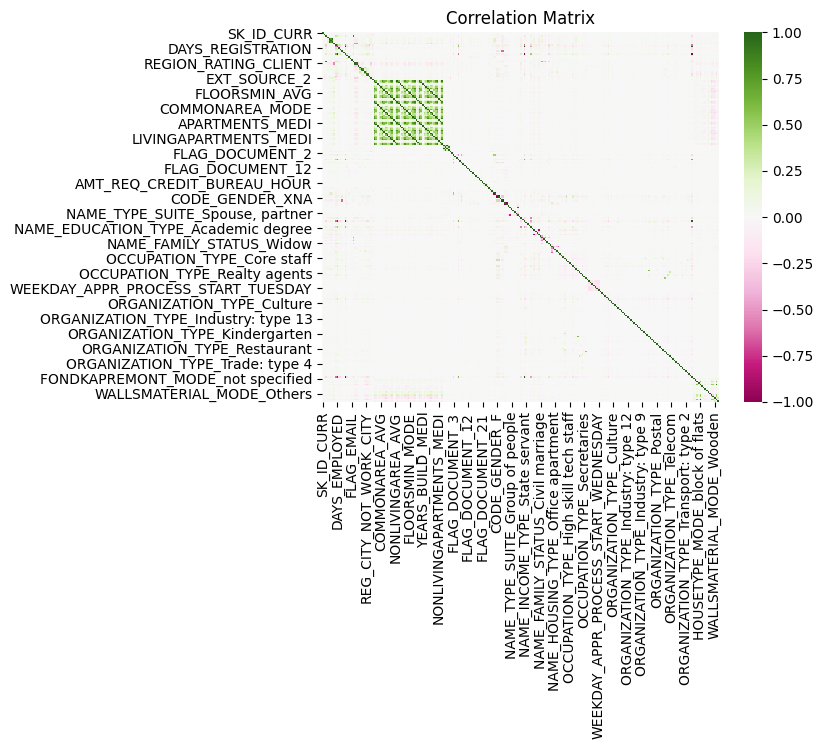

In [40]:
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='PiYG', center=0)
plt.title('Correlation Matrix')
plt.show()

## Part 2: Bureau

In [14]:
df_bureau = pd.read_csv(data_path + 'bureau.csv')
df_bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0000,-153.0000,NaN,0,91323.0000,0.0000,NaN,0.0000,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0000,NaN,NaN,0,225000.0000,171342.0000,NaN,0.0000,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0000,NaN,NaN,0,464323.5000,NaN,NaN,0.0000,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0000,NaN,NaN,0.0000,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0000,NaN,77674.5000,0,2700000.0000,NaN,NaN,0.0000,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0000,NaN,0.0000,0,11250.0000,11250.0000,0.0000,0.0000,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0000,-2493.0000,5476.5000,0,38130.8400,0.0000,0.0000,0.0000,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0000,-970.0000,NaN,0,15570.0000,NaN,NaN,0.0000,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0000,-1513.0000,NaN,0,36000.0000,0.0000,0.0000,0.0000,Consumer credit,-1508,NaN


In [22]:
## check primary key
df_bureau.shape[0], df_bureau.drop_duplicates(['SK_ID_BUREAU']).shape[0]

(1716428, 1716428)

In [23]:
describe_df(df_bureau)

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1716428.0000,1716428.0000,1716428.0000,1716428.0000,1610875.0000,1082775.0000,591940.0000,1716428.0000,1716415.0000,1458759.0000,1124648.0000,1716428.0000,1716428.0000,489637.0000
mean,278214.9336,5924434.4890,-1142.1077,0.8182,510.5174,-1017.4371,3825.4177,0.0064,354994.5919,137085.1200,6229.5150,37.9128,-593.7483,15712.7577
std,102938.5581,532265.7286,795.1649,36.5444,4994.2198,714.0106,206031.6062,0.0962,1149811.3440,677401.1310,45032.0315,5937.6500,720.7473,325826.9491
min,100001.0000,5000000.0000,-2922.0000,0.0000,-42060.0000,-42023.0000,0.0000,0.0000,0.0000,-4705600.3200,-586406.1150,0.0000,-41947.0000,0.0000
25%,188866.7500,5463953.7500,-1666.0000,0.0000,-1138.0000,-1489.0000,0.0000,0.0000,51300.0000,0.0000,0.0000,0.0000,-908.0000,0.0000
50%,278055.0000,5926303.5000,-987.0000,0.0000,-330.0000,-897.0000,0.0000,0.0000,125518.5000,0.0000,0.0000,0.0000,-395.0000,0.0000
75%,367426.0000,6385681.2500,-474.0000,0.0000,474.0000,-425.0000,0.0000,0.0000,315000.0000,40153.5000,0.0000,0.0000,-33.0000,13500.0000
max,456255.0000,6843457.0000,0.0000,2792.0000,31199.0000,0.0000,115987185.0000,9.0000,585000000.0000,170100000.0000,4705600.3200,3756681.0000,372.0000,118453423.5000


,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


CREDIT_ACTIVE
Closed     0.6288
Active     0.3674
Sold       0.0038
Bad debt   0.0000
Name: proportion, dtype: float64

CREDIT_CURRENCY
currency 1   0.9992
currency 2   0.0007
currency 3   0.0001
currency 4   0.0000
Name: proportion, dtype: float64

CREDIT_TYPE
Consumer credit                                0.7292
Credit card                                    0.2343
Car loan                                       0.0161
Mortgage                                       0.0107
Microloan                                      0.0072
Loan for business development                  0.0012
Another type of loan                           0.0006
Unknown type of loan                           0.0003
Loan for working capital replenishment         0.0003
Cash loan (non-earmarked)                      0.0000
Real estate loan                               0.0000
Loan for the purchase of equipment             0.0000
Loan for purchase of shares (margin lending)   0.0000
Mobile operator loan                

In [15]:
df_bureau_bal = pd.read_csv(data_path + 'bureau_balance.csv')
df_bureau_bal

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [24]:
## check primary key
df_bureau_bal.shape[0], df_bureau_bal.drop_duplicates(['SK_ID_BUREAU', 'MONTHS_BALANCE']).shape[0]

(27299925, 27299925)

In [25]:
describe_df(df_bureau_bal)

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE
count,27299925.0000,27299925.0000
mean,6036297.3330,-30.7417
std,492348.8569,23.8645
min,5001709.0000,-96.0000
25%,5730933.0000,-46.0000
50%,6070821.0000,-25.0000
75%,6431951.0000,-11.0000
max,6842888.0000,0.0000


,STATUS
count,27299925
unique,8
top,C
freq,13646993


STATUS
C   0.4999
0   0.2747
X   0.2128
1   0.0089
5   0.0023
2   0.0009
3   0.0003
4   0.0002
Name: proportion, dtype: float64



## Part 3: Previous Application

In [26]:
df_prev_app = pd.read_csv(data_path + 'previous_application.csv')
df_prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,NaN,607500.0000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,NaN,112500.0000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,NaN,450000.0000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,NaN,337500.0000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.2900,267295.5000,311400.0000,0.0000,267295.5000,WEDNESDAY,12,Y,1,0.0000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0000,low_normal,POS industry with interest,365243.0000,-508.0000,362.0000,-358.0000,-351.0000,0.0000
1670210,2357031,334635,Consumer loans,6622.0200,87750.0000,64291.5000,29250.0000,87750.0000,TUESDAY,15,Y,1,0.3406,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0000,middle,POS industry with interest,365243.0000,-1604.0000,-1274.0000,-1304.0000,-1297.0000,0.0000
1670211,2659632,249544,Consumer loans,11520.8550,105237.0000,102523.5000,10525.5000,105237.0000,MONDAY,12,Y,1,0.1014,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0000,low_normal,POS household with interest,365243.0000,-1457.0000,-1187.0000,-1187.0000,-1181.0000,0.0000
1670212,2785582,400317,Cash loans,18821.5200,180000.0000,191880.0000,NaN,180000.0000,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0000,low_normal,Cash X-Sell: low,365243.0000,-1155.0000,-825.0000,-825.0000,-817.0000,1.0000


In [27]:
## check primary key
df_prev_app.shape[0], df_prev_app.drop_duplicates('SK_ID_PREV').shape[0]

(1670214, 1670214)

In [28]:
describe_df(df_prev_app)

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.0000,1670214.0000,1297979.0000,1670214.0000,1670213.0000,774370.0000,1284699.0000,1670214.0000,1670214.0000,774370.0000,5951.0000,5951.0000,1670214.0000,1670214.0000,1297984.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000,997149.0000
mean,1923089.1353,278357.1741,15955.1207,175233.8604,196114.0212,6697.4021,227847.2793,12.4842,0.9965,0.0796,0.1884,0.7735,-880.6797,313.9511,16.0541,342209.8550,13826.2693,33767.7741,76582.4031,81992.3438,0.3326
std,532597.9587,102814.8238,14782.1373,292779.7624,318574.6165,20921.4954,315396.5579,3.3340,0.0593,0.1078,0.0877,0.1009,779.0997,7127.4435,14.5673,88916.1158,72444.8697,106857.0348,149647.4151,153303.5167,0.4711
min,1000001.0000,100001.0000,0.0000,0.0000,0.0000,-0.9000,0.0000,0.0000,0.0000,-0.0000,0.0348,0.3732,-2922.0000,-1.0000,0.0000,-2922.0000,-2892.0000,-2801.0000,-2889.0000,-2874.0000,0.0000
25%,1461857.2500,189329.0000,6321.7800,18720.0000,24160.5000,0.0000,50841.0000,10.0000,1.0000,0.0000,0.1607,0.7156,-1300.0000,-1.0000,6.0000,365243.0000,-1628.0000,-1242.0000,-1314.0000,-1270.0000,0.0000
50%,1923110.5000,278714.5000,11250.0000,71046.0000,80541.0000,1638.0000,112320.0000,12.0000,1.0000,0.0516,0.1891,0.8351,-581.0000,3.0000,12.0000,365243.0000,-831.0000,-361.0000,-537.0000,-499.0000,0.0000
75%,2384279.7500,367514.0000,20658.4200,180360.0000,216418.5000,7740.0000,234000.0000,15.0000,1.0000,0.1089,0.1933,0.8525,-280.0000,82.0000,24.0000,365243.0000,-411.0000,129.0000,-74.0000,-44.0000,1.0000
max,2845382.0000,456255.0000,418058.1450,6905160.0000,6905160.0000,3060045.0000,6905160.0000,23.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,4000000.0000,84.0000,365243.0000,365243.0000,365243.0000,365243.0000,365243.0000,1.0000


,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


NAME_CONTRACT_TYPE
Cash loans        0.4476
Consumer loans    0.4366
Revolving loans   0.1157
XNA               0.0002
Name: proportion, dtype: float64

WEEKDAY_APPR_PROCESS_START
TUESDAY     0.1527
WEDNESDAY   0.1527
MONDAY      0.1518
FRIDAY      0.1509
THURSDAY    0.1491
SATURDAY    0.1441
SUNDAY      0.0986
Name: proportion, dtype: float64

FLAG_LAST_APPL_PER_CONTRACT
Y   0.9949
N   0.0051
Name: proportion, dtype: float64

NAME_CONTRACT_STATUS
Approved       0.6207
Canceled       0.1894
Refused        0.1740
Unused offer   0.0158
Name: proportion, dtype: float64

NAME_PAYMENT_TYPE
Cash through the bank                       0.6188
XNA                                         0.3756
Non-cash from your account                  0.0049
Cashless from the account of the employer   0.0006
Name: proportion, dtype: float64

CODE_REJECT_REASON
XAP      0.8101
HC       0.1049
LIMIT    0.0333
SCO      0.0224
CLIENT   0.0158
SCOFR    0.0077
XNA      0.0031
VERIF    0.0021
SYSTEM   0.0004
Name: p

In [41]:
## columns in both applications
[c for c in df_prev_app.columns if c in df_app_train.columns]

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

In [42]:
## columns in previous applications but not in current application
[c for c in df_prev_app.columns if c not in df_app_train.columns]

['SK_ID_PREV',
 'AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [43]:
df_prev_app.groupby(['NAME_CONTRACT_TYPE', 'NAME_PORTFOLIO', 'NAME_CASH_LOAN_PURPOSE'])['SK_ID_PREV'].count()

NAME_CONTRACT_TYPE  NAME_PORTFOLIO  NAME_CASH_LOAN_PURPOSE          
Cash loans          Cash            Building a house or an annex          2693
                                    Business development                   425
                                    Buying a garage                        136
                                    Buying a holiday home / land           533
                                    Buying a home                          865
                                    Buying a new car                      1006
                                    Buying a used car                     2872
                                    Car repairs                            797
                                    Education                             1567
                                    Everyday expenses                     2394
                                    Furniture                              748
                                    Gasification / water suppl

In [29]:
df_pos_bal = pd.read_csv(data_path + 'POS_CASH_balance.csv')
df_pos_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0000,45.0000,Active,0,0
1,1715348,367990,-33,36.0000,35.0000,Active,0,0
2,1784872,397406,-32,12.0000,9.0000,Active,0,0
3,1903291,269225,-35,48.0000,42.0000,Active,0,0
4,2341044,334279,-35,36.0000,35.0000,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0000,0.0000,Active,843,0
10001354,1717234,141565,-19,12.0000,0.0000,Active,602,0
10001355,1283126,315695,-21,10.0000,0.0000,Active,609,0
10001356,1082516,450255,-22,12.0000,0.0000,Active,614,0


In [30]:
## check primary key
df_pos_bal.shape[0], df_pos_bal.drop_duplicates(['SK_ID_PREV', 'MONTHS_BALANCE']).shape[0]

(10001358, 10001358)

In [31]:
describe_df(df_pos_bal)

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,10001358.0000,10001358.0000,10001358.0000,9975287.0000,9975271.0000,10001358.0000,10001358.0000
mean,1903216.5990,278403.8633,-35.0126,17.0897,10.4838,11.6069,0.6545
std,535846.5307,102763.7451,26.0666,11.9951,11.1091,132.7140,32.7625
min,1000001.0000,100001.0000,-96.0000,1.0000,0.0000,0.0000,0.0000
25%,1434405.0000,189550.0000,-54.0000,10.0000,3.0000,0.0000,0.0000
50%,1896565.0000,278654.0000,-28.0000,12.0000,7.0000,0.0000,0.0000
75%,2368963.0000,367429.0000,-13.0000,24.0000,14.0000,0.0000,0.0000
max,2843499.0000,456255.0000,-1.0000,92.0000,85.0000,4231.0000,3595.0000


,NAME_CONTRACT_STATUS
count,10001358
unique,9
top,Active
freq,9151119


NAME_CONTRACT_STATUS
Active                  0.9150
Completed               0.0745
Signed                  0.0087
Demand                  0.0007
Returned to the store   0.0005
Approved                0.0005
Amortized debt          0.0001
Canceled                0.0000
XNA                     0.0000
Name: proportion, dtype: float64



In [32]:
df_credit_bal = pd.read_csv(data_path + 'credit_card_balance.csv')
df_credit_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.9700,135000,0.0000,877.5000,0.0000,877.5000,1700.3250,1800.0000,1800.0000,0.0000,0.0000,0.0000,0.0000,1,0.0000,1.0000,35.0000,Active,0,0
1,2582071,363914,-1,63975.5550,45000,2250.0000,2250.0000,0.0000,0.0000,2250.0000,2250.0000,2250.0000,60175.0800,64875.5550,64875.5550,1.0000,1,0.0000,0.0000,69.0000,Active,0,0
2,1740877,371185,-7,31815.2250,450000,0.0000,0.0000,0.0000,0.0000,2250.0000,2250.0000,2250.0000,26926.4250,31460.0850,31460.0850,0.0000,0,0.0000,0.0000,30.0000,Active,0,0
3,1389973,337855,-4,236572.1100,225000,2250.0000,2250.0000,0.0000,0.0000,11795.7600,11925.0000,11925.0000,224949.2850,233048.9700,233048.9700,1.0000,1,0.0000,0.0000,10.0000,Active,0,0
4,1891521,126868,-1,453919.4550,450000,0.0000,11547.0000,0.0000,11547.0000,22924.8900,27000.0000,27000.0000,443044.3950,453919.4550,453919.4550,0.0000,1,0.0000,1.0000,101.0000,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.0000,45000,NaN,0.0000,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,NaN,0,NaN,NaN,0.0000,Active,0,0
3840308,1714892,347207,-9,0.0000,45000,0.0000,0.0000,0.0000,0.0000,0.0000,1879.1100,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000,23.0000,Active,0,0
3840309,1302323,215757,-9,275784.9750,585000,270000.0000,270000.0000,0.0000,0.0000,2250.0000,375750.0000,356994.6750,269356.1400,273093.9750,273093.9750,2.0000,2,0.0000,0.0000,18.0000,Active,0,0
3840310,1624872,430337,-10,0.0000,450000,NaN,0.0000,NaN,NaN,0.0000,NaN,0.0000,0.0000,0.0000,0.0000,NaN,0,NaN,NaN,0.0000,Active,0,0


In [33]:
## check primary key
df_credit_bal.shape[0], df_credit_bal.drop_duplicates(['SK_ID_PREV', 'MONTHS_BALANCE']).shape[0]

(3840312, 3840312)

In [34]:
describe_df(df_credit_bal)

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3840312.0000,3840312.0000,3840312.0000,3840312.0000,3840312.0000,3090496.0000,3840312.0000,3090496.0000,3090496.0000,3535076.0000,3072324.0000,3840312.0000,3840312.0000,3840312.0000,3840312.0000,3090496.0000,3840312.0000,3090496.0000,3090496.0000,3535076.0000,3840312.0000,3840312.0000
mean,1904503.5899,278324.2073,-34.5219,58300.1553,153807.9574,5961.3248,7433.3882,288.1696,2968.8048,3540.2041,10280.5377,7588.8567,55965.8769,58088.8112,58098.2855,0.3094,0.7031,0.0048,0.5595,20.8251,9.2837,0.3316
std,536469.4706,102704.4751,26.6678,106307.0310,165145.6995,28225.6886,33846.0773,8201.9893,20796.8870,5600.1541,36078.0850,32005.9878,102533.6168,105965.3699,105971.8011,1.1004,3.1903,0.0826,3.2406,20.0515,97.5157,21.4792
min,1000018.0000,100006.0000,-96.0000,-420250.1850,0.0000,-6827.3100,-6211.6200,0.0000,0.0000,0.0000,0.0000,0.0000,-423305.8200,-420250.1850,-420250.1850,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1434385.0000,189517.0000,-55.0000,0.0000,45000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,152.3700,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0000,0.0000
50%,1897122.0000,278396.0000,-28.0000,0.0000,112500.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2702.7000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,0.0000
75%,2369327.7500,367580.0000,-11.0000,89046.6862,180000.0000,0.0000,0.0000,0.0000,0.0000,6633.9112,9000.0000,6750.0000,85359.2400,88899.4912,88914.5100,0.0000,0.0000,0.0000,0.0000,32.0000,0.0000,0.0000
max,2843496.0000,456250.0000,-1.0000,1505902.1850,1350000.0000,2115000.0000,2287098.3150,1529847.0000,2239274.1600,202882.0050,4289207.4450,4278315.6900,1472316.7950,1493338.1850,1493338.1850,51.0000,165.0000,12.0000,165.0000,120.0000,3260.0000,3260.0000


,NAME_CONTRACT_STATUS
count,3840312
unique,7
top,Active
freq,3698436


NAME_CONTRACT_STATUS
Active          0.9631
Completed       0.0336
Signed          0.0029
Demand          0.0004
Sent proposal   0.0001
Refused         0.0000
Approved        0.0000
Name: proportion, dtype: float64



In [35]:
df_payment = pd.read_csv(data_path + 'installments_payments.csv')
df_payment

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0000,6,-1180.0000,-1187.0000,6948.3600,6948.3600
1,1330831,151639,0.0000,34,-2156.0000,-2156.0000,1716.5250,1716.5250
2,2085231,193053,2.0000,1,-63.0000,-63.0000,25425.0000,25425.0000
3,2452527,199697,1.0000,3,-2418.0000,-2426.0000,24350.1300,24350.1300
4,2714724,167756,1.0000,2,-1383.0000,-1366.0000,2165.0400,2160.5850
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0000,66,-1624.0000,NaN,67.5000,NaN
13605397,1310347,414406,0.0000,47,-1539.0000,NaN,67.5000,NaN
13605398,1308766,402199,0.0000,43,-7.0000,NaN,43737.4350,NaN
13605399,1062206,409297,0.0000,43,-1986.0000,NaN,67.5000,NaN


In [36]:
## check primary key --> seem recorded per payment (no-key based on AMT_PAYMENT might not be unique)
df_payment.shape[0], \
df_payment.drop_duplicates(['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']).shape[0]

(13605401, 13605401)

In [37]:
describe_df(df_payment)

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,13605401.0000,13605401.0000,13605401.0000,13605401.0000,13605401.0000,13602496.0000,13605401.0000,13602496.0000
mean,1903364.9695,278444.8817,0.8566,18.8709,-1042.2700,-1051.1137,17050.9070,17238.2232
std,536202.9055,102718.3104,1.0352,26.6641,800.9463,800.5859,50570.2544,54735.7840
min,1000001.0000,100001.0000,0.0000,1.0000,-2922.0000,-4921.0000,0.0000,0.0000
25%,1434191.0000,189639.0000,0.0000,4.0000,-1654.0000,-1662.0000,4226.0850,3398.2650
50%,1896520.0000,278685.0000,1.0000,8.0000,-818.0000,-827.0000,8884.0800,8125.5150
75%,2369094.0000,367530.0000,1.0000,19.0000,-361.0000,-370.0000,16710.2100,16108.4250
max,2843499.0000,456255.0000,178.0000,277.0000,-1.0000,-1.0000,3771487.8450,3771487.8450


In [38]:
df_payment[df_payment['AMT_PAYMENT'].fillna(0) == 0]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
9171,1514613,197031,0.0000,10,-2165.0000,-2191.0000,4500.0000,0.0000
27338,2769227,126104,0.0000,10,-2311.0000,-2304.0000,7875.0000,0.0000
39555,1685553,110052,0.0000,9,-2434.0000,-2462.0000,9000.0000,0.0000
51978,1522932,153001,0.0000,21,-2479.0000,-2509.0000,9000.0000,0.0000
52839,2254262,197304,0.0000,17,-2331.0000,-2358.0000,9000.0000,0.0000
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0000,66,-1624.0000,NaN,67.5000,NaN
13605397,1310347,414406,0.0000,47,-1539.0000,NaN,67.5000,NaN
13605398,1308766,402199,0.0000,43,-7.0000,NaN,43737.4350,NaN
13605399,1062206,409297,0.0000,43,-1986.0000,NaN,67.5000,NaN
